In [ ]:
import cv2
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = dataset

In [ ]:
# Normalize Inputs from 0–255 to 0–1
x_train = x_train / 255
x_test = x_test / 255

# One-Hot Encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

num_classes = 10

x_train_simple = x_train.reshape(60000, 28 * 28).astype('float32')
x_test_simple = x_test.reshape(10000, 28 * 28).astype('float32')

print ("X_train.shape: {}".format(x_train.shape))
print ("y_train.shape: {}".format(y_train.shape))
print ("X_test.shape: {}".format(x_test.shape))
print ("y_test.shape: {}".format(y_test.shape))

X_train.shape: (60000, 28, 28)
y_train.shape: (60000, 10)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000, 10)


In [ ]:
# Neural network model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=2)

Epoch 1/30
300/300 - 37s - loss: 0.3826 - accuracy: 0.8831 - val_loss: 0.0804 - val_accuracy: 0.9748 - 37s/epoch - 124ms/step
Epoch 2/30
300/300 - 36s - loss: 0.0947 - accuracy: 0.9710 - val_loss: 0.0515 - val_accuracy: 0.9843 - 36s/epoch - 120ms/step
Epoch 3/30
300/300 - 37s - loss: 0.0684 - accuracy: 0.9789 - val_loss: 0.0399 - val_accuracy: 0.9868 - 37s/epoch - 123ms/step
Epoch 4/30
300/300 - 36s - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.0336 - val_accuracy: 0.9894 - 36s/epoch - 119ms/step
Epoch 5/30
300/300 - 37s - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.0295 - val_accuracy: 0.9902 - 37s/epoch - 124ms/step
Epoch 6/30
300/300 - 37s - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0270 - val_accuracy: 0.9901 - 37s/epoch - 124ms/step
Epoch 7/30
300/300 - 36s - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0291 - val_accuracy: 0.9912 - 36s/epoch - 119ms/step
Epoch 8/30
300/300 - 37s - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0307 - val_accuracy: 0.9902 - 37s/epoch - 123

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0280 - accuracy: 0.9919
0.9919000267982483


In [ ]:
model.save('result.model')
model.save('model.h5')

INFO:tensorflow:Assets written to: result.model/assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

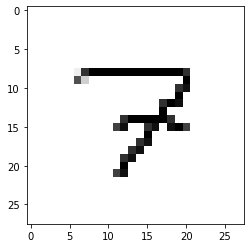

The number is probably a 2


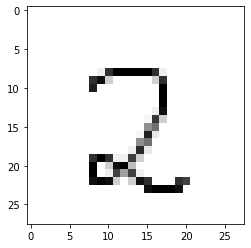

The number is probably a 9


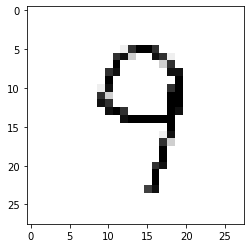

The number is probably a 8


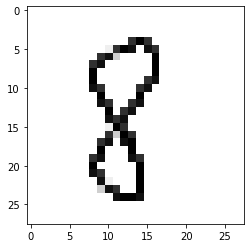

The number is probably a 5


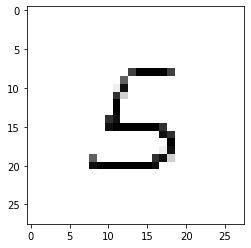

The number is probably a 8


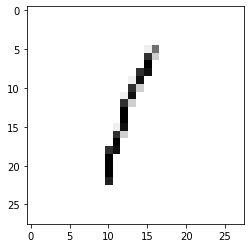

The number is probably a 1


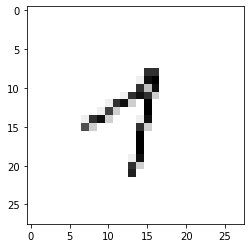

The number is probably a 8


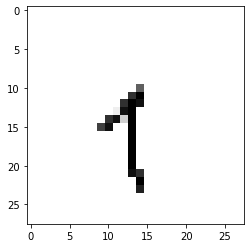

The number is probably a 7


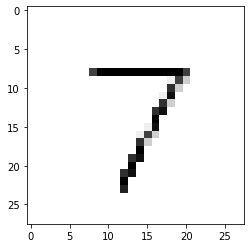

The number is probably a 7


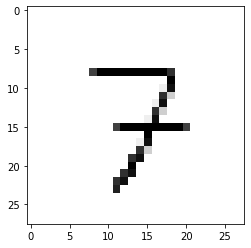

The number is probably a 0


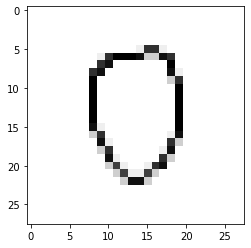

The number is probably a 5


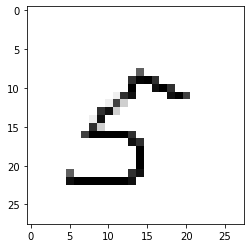

The number is probably a 3


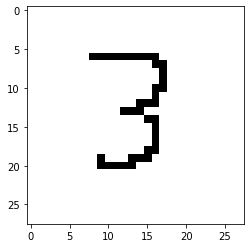

The number is probably a 2


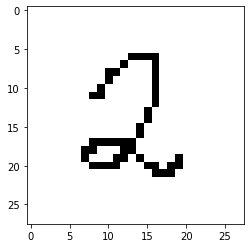

The number is probably a 8


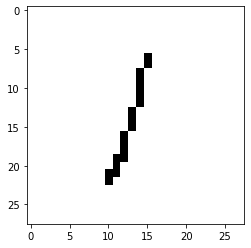

The number is probably a 0


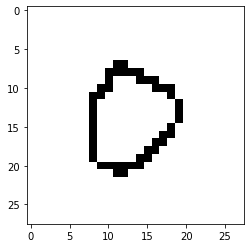

The number is probably a 8


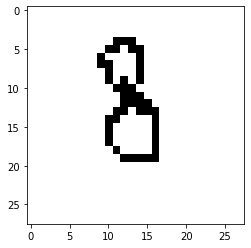

The number is probably a 7


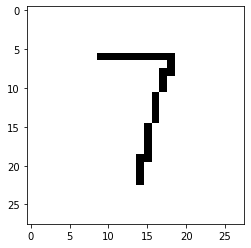

The number is probably a 4


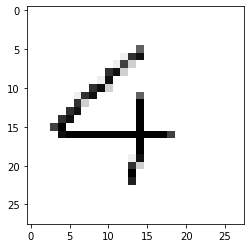

The number is probably a 3


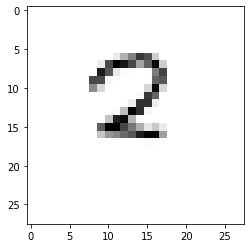

The number is probably a 8


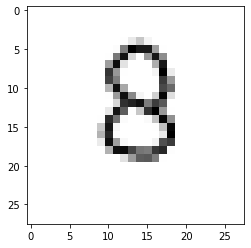

The number is probably a 6


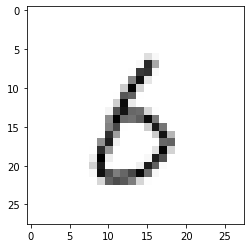

The number is probably a 8


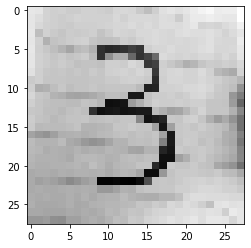

The number is probably a 8


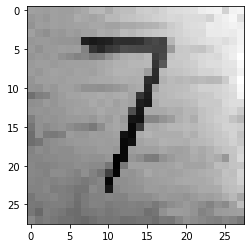

In [ ]:
model = tf.keras.models.load_model('/content/model.h5')

print(model.summary())

image_number = 1
path = '/content/drive/MyDrive/digits/digit{}.png'

while os.path.isfile(path.format(image_number)):
    try:
        img = cv2.imread(path.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Next...")
        image_number += 1

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# convert to tensorflowjs
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'